# Lane Detection

Experiment with lane detection (own lane, lane to left if any)

https://www.youtube.com/playlist?list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K

https://www.youtube.com/watch?v=yvfI4p6Wyvk

https://medium.com/analytics-vidhya/building-a-lane-detection-system-f7a727c6694

https://github.com/Arun-purakkatt/medium_repo/blob/main/road_lane_detection%20(1).py


## Load image and apply mask

(1080, 1920, 3)


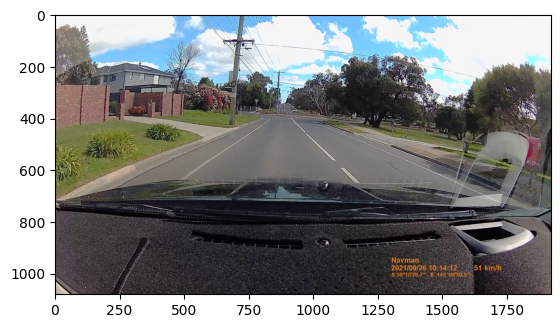

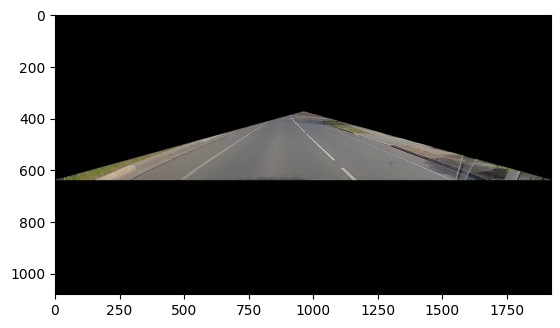

In [1]:
import os
import sys
import matplotlib.pylab as plt
import cv2
import numpy as np

module_path_root = os.path.abspath(os.pardir)
if module_path_root not in sys.path:
    sys.path.append(module_path_root)
    
#sample_file = os.path.join(os.pardir, 'data_sources', 'sample_dashcam_lanes.png')
#sample_file = os.path.join(module_path_root, 'data_sources', 'dashcam_samples', 'corrected_ram_01_02160.png')
sample_file = os.path.join(module_path_root, 'data_sources', 'evil2.png')

original_image = cv2.imread(sample_file)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

print(original_image.shape)
height = original_image.shape[0]
width = original_image.shape[1]

region_of_interest_vertices = [
    (0, 640),
    (width/2, 375),
    (width, 640)
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
      
cropped_image = region_of_interest(original_image, np.array([region_of_interest_vertices],np.int32))

plt.imshow(original_image)
plt.show()

plt.imshow(cropped_image)
plt.show()

## Apply Canny Edge Detection

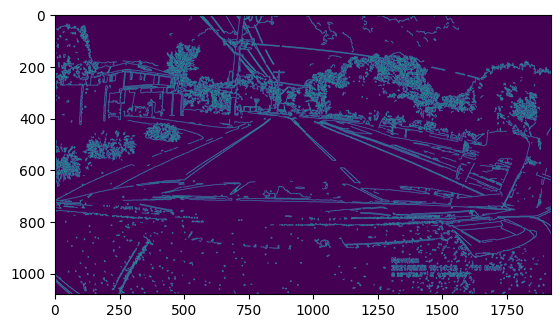

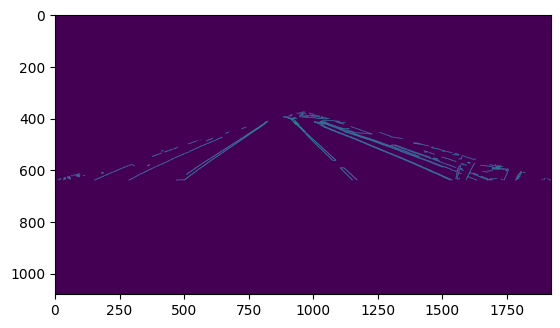

In [2]:
# Convert image to greyscale
# We want to use Canny edge detection FIRST, before cropping
# If we crop first, then the margins of the crop will be artificially detected as edges!
grey_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

blur_image = cv2.GaussianBlur(grey_image, (5, 5), 0)

canny_image = cv2.Canny(blur_image, 100, 200)

cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices],np.int32))

plt.imshow(canny_image)
plt.show()

plt.imshow(cropped_image)
plt.show()

## Apply Hough Line Transform

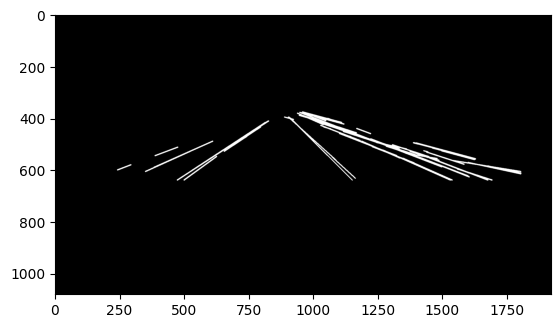

62


In [3]:
lines = cv2.HoughLinesP(
    cropped_image, 
    rho           = 2, 
    theta         = np.pi/60, # 60, 180
    threshold     = 100, #160, 100
    lines         = np.array([]), 
    minLineLength = 10, #10, 100
    maxLineGap    = 50 #100, 5
)

def draw_lines(img, lines):
    img = np.copy(img)
    
    line_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), thickness=3)
    
    #img = cv2.addWeighted(img, 0.8, line_image, 1, 0.0)
    #return img
    return line_image

image_with_lines = draw_lines(original_image, lines)
    
plt.imshow(image_with_lines)
plt.show()    

print(len(lines))

In [4]:
print(lines.squeeze())

[[1098  444 1330  520]
 [1113  452 1390  542]
 [ 669  513  825  412]
 [1268  525 1527  640]
 [1053  402 1106  422]
 [1529  600 1600  628]
 [ 945  379 1494  589]
 [1386  496 1624  559]
 [ 911  402  970  461]
 [ 530  602  812  418]
 [ 349  607  522  529]
 [1471  563 1672  640]
 [ 946  390 1152  457]
 [1219  481 1595  625]
 [ 901  397 1085  563]
 [1098  460 1320  546]
 [1241  495 1358  520]
 [1303  504 1444  550]
 [1344  556 1534  640]
 [1070  551 1160  633]
 [1184  490 1332  555]
 [ 498  640  624  549]
 [ 904  397 1051  544]
 [1165  441 1219  461]
 [1493  527 1620  561]
 [1355  537 1476  557]
 [ 909  401 1148  640]
 [ 386  546  474  513]
 [1101  461 1143  473]
 [1395  497 1624  558]
 [1445  554 1600  613]
 [1595  572 1799  616]
 [1435  532 1580  579]
 [ 956  377 1046  411]
 [ 943  390  970  398]
 [1424  527 1440  531]
 [ 936  382 1036  426]
 [1023  417 1139  454]
 [1460  556 1483  564]
 [1554  597 1688  640]
 [1404  551 1595  624]
 [ 653  529  741  471]
 [1125  470 1147  475]
 [1457  516

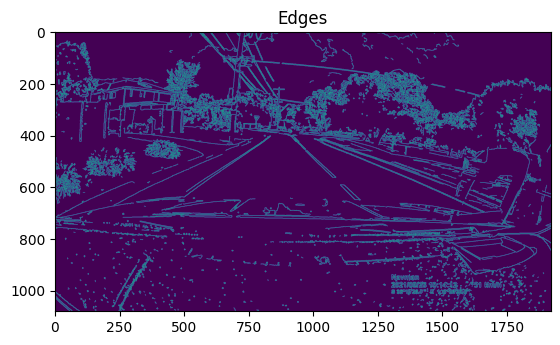

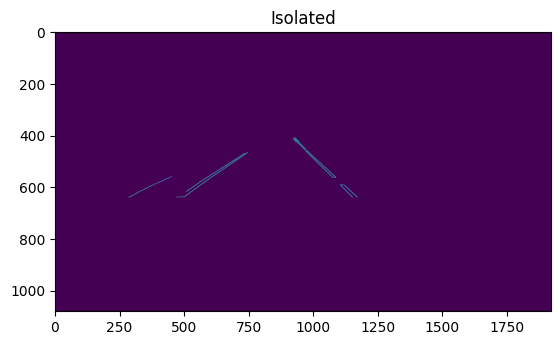

62
Left:  [(-0.6474358974358976, 946.1346153846156), (-0.6524822695035449, 947.8156028368782), (-0.45086705202312205, 764.3526011560696), (-0.7222222222222221, 999.6666666666667), (-0.3749999999999999, 690.7499999999999), (-0.6590909090909101, 959.3863636363641), (-0.38461538461537953, 693.6923076923059), (-0.6485714285714284, 946.1257142857139), (-0.4449339207048449, 760.9647577092506), (-0.6621621621621684, 960.756756756762)]
Right: [(0.32758620689655094, 84.31034482758729), (0.3249097472924185, 90.37545126353832), (0.44401544401544407, -38.01158301158291), (0.37735849056603615, 4.64150943396385), (0.39436619718309857, -2.985915492957784), (0.38251366120218583, 17.524590163934405), (0.26470588235294107, 129.11764705882388), (1.0000000000000033, -509.000000000003), (0.3830845771144266, -0.5174129353215952), (0.32524271844660146, 82.32038834951487), (0.38297872340425526, 14.148936170213009), (0.9021739130434788, -415.8586956521748), (0.3873873873873866, 34.64864864864954), (0.213675213

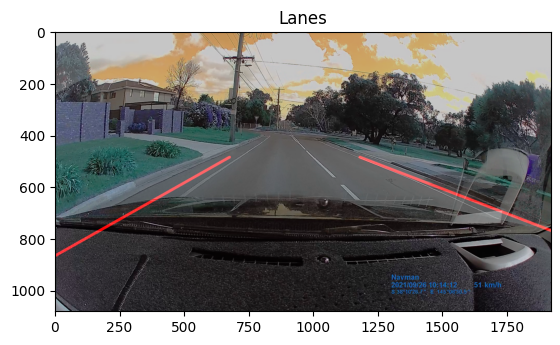

In [5]:
# https://medium.com/analytics-vidhya/building-a-lane-detection-system-f7a727c6694

import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = sample_file
image1 = cv2.imread(image_path)
plt.imshow(image1)

def grey(image):
  #convert to grayscale
    image = np.asarray(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  #Apply Gaussian Blur --> Reduce noise and smoothen image
def gauss(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

  #outline the strongest gradients in the image --> this is where lines in the image are
def canny(image):
    edges = cv2.Canny(image,50,150)
    return edges

def region(image, triangle):
    height, width = image.shape
    #isolate the gradients that correspond to the lane lines
    # from "triangle" parameter
    
    #create a black image with the same dimensions as original image
    mask = np.zeros_like(image)
    #create a mask (triangle that isolates the region of interest in our image)
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

def display_lines(image, lines):
    print('display lines: ' + str(lines))
    lines_image = np.zeros_like(image)
    #make sure array isn't empty
    if lines is not None:
        for idx, line in enumerate(lines):
            if line is not None:
                x1, y1, x2, y2 = line
                #draw lines on a black image
                if idx <= 1:
                    color = (255, 0, 0)
                else:
                    color = (0, 255, 0)
                cv2.line(lines_image, (x1, y1), (x2, y2), color, 10)
    return lines_image

def average(image, lines, limit):
    left = []
    right = []

    if lines is not None:
      for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        #fit line to points, return slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        #lines on the right have positive slope, and lines on the left have neg slope
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
    
    print('Left:  ' + str(left))
    print('Right: ' + str(right))
    
    #takes average among all the columns (column0: slope, column1: y_int)
    if len(right) > 0:
        right_avg = np.average(right, axis=0)
        right_line, right_slope, right_int = make_points(image, right_avg, limit)
    else:
        right_avg   = None
        right_line  = None
        right_slope = None
        right_int   = None
        
    if len(left) > 0:
        left_avg = np.average(left, axis=0)
        left_line, left_slope, left_int = make_points(image, left_avg, limit)
    else:
        left_avg   = None
        left_line  = None
        left_slope = None
        left_int   = None
                
    return np.array([left_line, right_line]), left_slope, left_int, right_slope, right_int
   
    
def make_points(image, average, limit):
    if average is None:
        return None
    
    slope, y_int = average
    y1 = image.shape[0]
    #how long we want our lines to be --> 3/5 the size of the image
    y2 = int(y1 * limit)
    #determine algebraically
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2]), slope, y_int



'''##### DETECTING lane lines in image ######'''


copy = np.copy(image1)

initial_region = np.array([
    [(500, 640), (int(width/2), 400), (width-500, 640)]
])

initial_region = np.array([
    [(200, 640), (int(width/2), 400), (width-500, 640)]
])

isolated = region(canny_image, initial_region)

plt.imshow(canny_image)
plt.title('Edges')
plt.show()

plt.imshow(isolated)
plt.title('Isolated')
plt.show()

#DRAWING LINES: (order of params) --> region of interest, bin size (P, theta), min intersections needed, placeholder array, 
#lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

lines = cv2.HoughLinesP(isolated, 2, np.pi/60, 100, np.array([]), minLineLength=10, maxLineGap=50)

lines = cv2.HoughLinesP(
    cropped_image, 
    rho           = 2, 
    theta         = np.pi/60, # 60, 180
    threshold     = 100, #160, 100
    lines         = np.array([]), 
    minLineLength = 10, #10, 100
    maxLineGap    = 50 #100, 5
)


print(len(lines))

averaged_lines1, left_slope1, left_int1, right_slope1, right_int1 = average(copy, lines, 9/20)
black_lines = display_lines(copy, averaged_lines1)
#taking wighted sum of original image and lane lines image
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)

plt.imshow(lanes)
plt.title('Lanes')
plt.show()


# Second pass to find the next lane over

Move the area of interest further to the left.  How far?  To the left of the left lane already identified

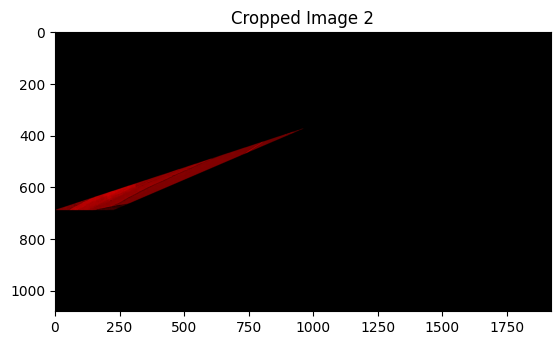

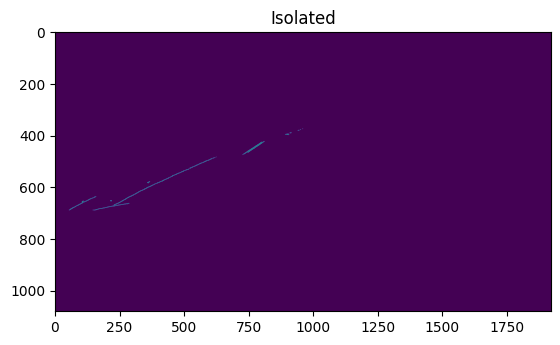

Left:  [(-0.4460966542750925, 762.6877323420072), (-0.5057471264367813, 784.2183908045976), (-0.444444444444444, 759.8888888888888), (-0.6486486486486486, 945.9729729729729), (-0.5060240963855414, 716.3614457831322)]
Right: []
display lines: [[-378 1080  674  486]
 [2727 1080 1177  486]
 [-561 1080  603  486]]


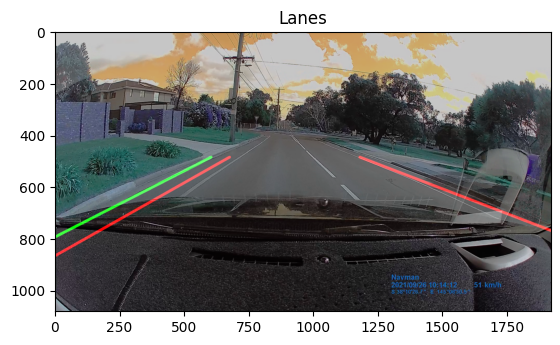

In [6]:
left_region = np.array([
    [(0, 640), (int(width/2), 375), (int(round((640 - left_int1) / left_slope1)), 640)]
])

left_region = np.array([
    [(0, 690), (int(width/2), 375), (int(round((690 - left_int1 + 50) / left_slope1)), 690)]
])



original_image = cv2.imread(sample_file)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

cropped_image2 = region_of_interest(original_image, np.array(left_region,np.int32))

plt.imshow(cropped_image2)
plt.title('Cropped Image 2')
plt.show()


isolated = region(canny_image, left_region)

plt.imshow(isolated)
plt.title('Isolated')
plt.show()

#DRAWING LINES: (order of params) --> region of interest, bin size (P, theta), min intersections needed, placeholder array, 
lines = cv2.HoughLinesP(isolated, 2, np.pi/60, 100, np.array([]), minLineLength=10, maxLineGap=100)
averaged_lines2, left_slope2, left_int2, right_slope2, right_int2  = average(copy, lines, 9/20)
averaged_lines = np.array([averaged_lines1[0], averaged_lines1[1], averaged_lines2[0]])
black_lines2 = display_lines(copy, averaged_lines)
#taking wighted sum of original image and lane lines image
lanes = cv2.addWeighted(copy, 0.8, black_lines2, 1, 1)

plt.imshow(lanes)
plt.title('Lanes')
plt.show()



In [7]:
cv2.imwrite(os.path.join(os.pardir, 'data_sources', 'lane_demo.png'), lanes)

True

In [8]:
horizontal = 640

green = (horizontal - left_int2) / left_slope2
red1  = (horizontal - left_int1) / left_slope1
red2  = (horizontal - right_int1) / right_slope1

print(green, left_slope2, left_int2)
print(red1, left_slope1, left_int1)
print(red2, right_slope1, right_int1)

301.5057618596804 -0.5101921940381016 793.8258861583197
401.8934240715144 -0.5647381246329518 866.9645386124627
1579.3500391204068 0.38315861221043596 34.858430816127246


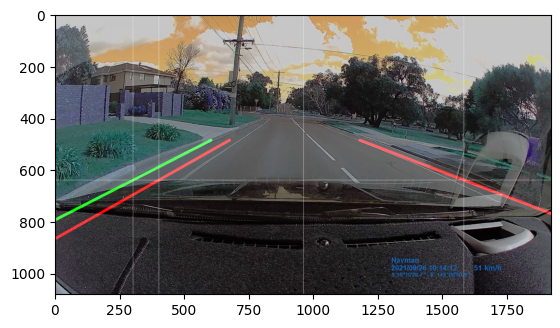

In [9]:
cv2.line(lanes, (0, 640), (width, 640), (255, 255, 255), thickness=1)
cv2.line(lanes, (int(width/2), 0), (int(width/2), height), (255, 255, 255), thickness=1)
cv2.line(lanes, (int(green), 0), (int(green), 1080), (255, 255, 255), thickness=1)
cv2.line(lanes, (int(red1), 0), (int(red1), 1080), (255, 255, 255), thickness=1)
cv2.line(lanes, (int(red2), 0), (int(red2), 1080), (255, 255, 255), thickness=1)

plt.imshow(lanes)
plt.show()


In [10]:
green_offset = abs((width/2) - green)
red1_offset  = abs((width/2) - red1)
red2_offset  = abs((width/2) - red2)

print(int(width/2))
print(green_offset, green)
print(red1_offset, red1)
print(red2_offset, red2)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

model_filename_poly = os.path.join(module_path_root, 'models', 'distance_poly.csv')
model_filename_pol  = os.path.join(module_path_root, 'models', 'distance_pol.csv')

loaded_poly = pickle.load(open(model_filename_poly, 'rb'))
loaded_pol  = pickle.load(open(model_filename_pol,  'rb'))


predictions = loaded_pol.predict(loaded_poly.fit_transform([[green_offset], [red1_offset], [red2_offset]]))

print(predictions)

960
658.4942381403196 301.5057618596804
558.1065759284857 401.8934240715144
619.3500391204068 1579.3500391204068
[362.4935444  298.72378883 336.71486718]


In [11]:
print ('Bike lane width: {0:.2f}'.format(predictions[0] - predictions[1]))

Bike lane width: 63.77


In [12]:
def loaded_predict(X):
    return loaded_pol.predict(loaded_poly.fit_transform([[X]]))

print(loaded_predict(559))
print(loaded_predict(398))

[299.25954086]
[209.34232005]
